# Task 1: Exploratory Data Analysis (EDA) and Business Insights

### 1. Perform EDA on the provided dataset.
### 2. Derive at least 5 business insights from the EDA.
#### ○ Write these insights in short point-wise sentences (maximum 100 words per insight).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Merge datasets for comprehensive analysis
df = pd.merge(transactions, customers, on='CustomerID')
df = pd.merge(df, products, on='ProductID')

In [5]:
# Basic EDA
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 109.4+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

# Business Insights

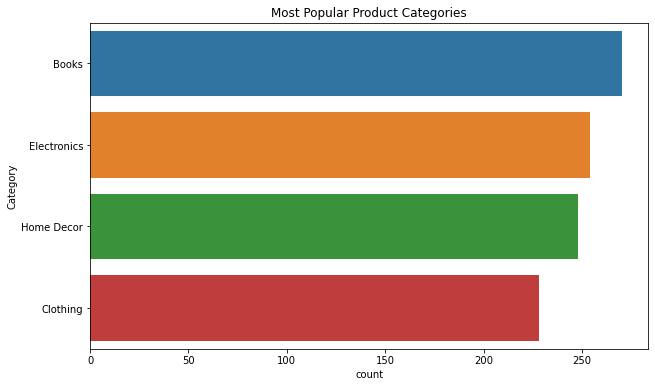

In [6]:
# Insight 1: Most popular product categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Most Popular Product Categories')
plt.show()

<AxesSubplot:title={'center':'Total Sales by Region'}, xlabel='Region'>

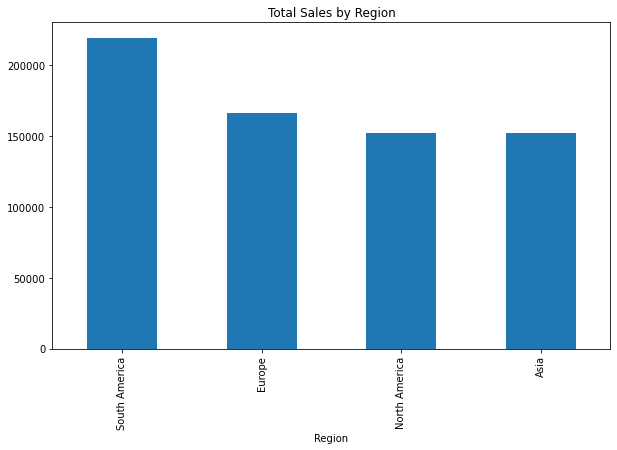

In [7]:
# Insight 2: Total sales by region
region_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(10, 6), title='Total Sales by Region')

<AxesSubplot:title={'center':'Customer Signups Over Time'}, xlabel='SignupDate'>

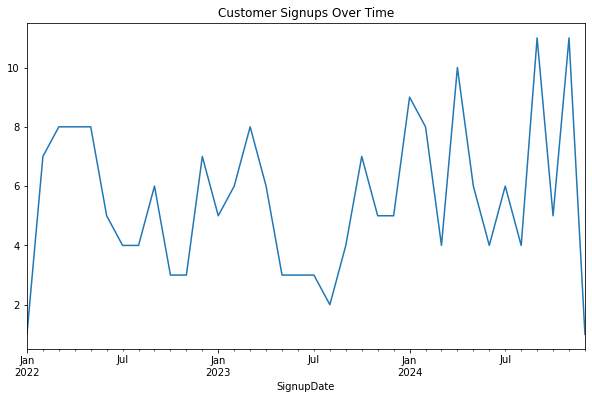

In [8]:
# Insight 3: Customer signups over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers.set_index('SignupDate', inplace=True)
customers.resample('M').size().plot(figsize=(10, 6), title='Customer Signups Over Time')

<AxesSubplot:title={'center':'Average Transaction Value by Product Category'}, xlabel='Category'>

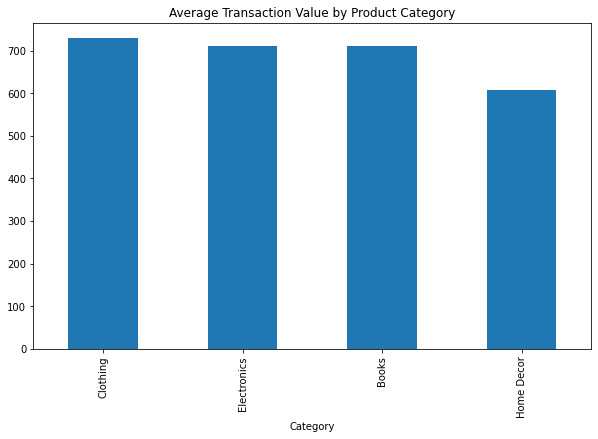

In [9]:
# Insight 4: Average transaction value by product category
avg_transaction_value = df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
avg_transaction_value.plot(kind='bar', figsize=(10, 6), title='Average Transaction Value by Product Category')

<AxesSubplot:title={'center':'Customer Lifetime Value by Region'}, xlabel='Region'>

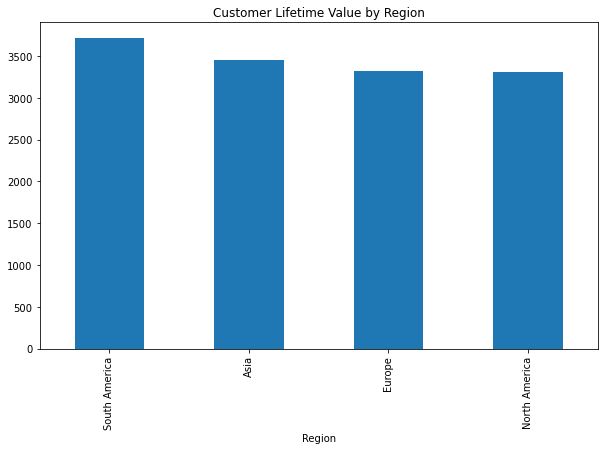

In [10]:
# Insight 5: Customer lifetime value (CLV) by region
clv = df.groupby('CustomerID')['TotalValue'].sum().reset_index()
clv = pd.merge(clv, customers.reset_index()[['CustomerID', 'Region']], on='CustomerID')
clv.groupby('Region')['TotalValue'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Customer Lifetime Value by Region')